In [1]:
library(tidyverse)
library(stringr) 
library(plotly)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
##############################################################################

##########################     INPUT PARAMETERS    ###########################

##############################################################################



# filetype = # "ratio_all_germline_singletons_excluded_tumor_4_cs" # # "ratio_singletons_excluded_tumor_4_cs" # "ratio" 
filetype = "ratio"

# input_folder =   "ci5_cs1e9" # "all_germline_ci5_cs1e9" # "all_germline_filtered_bams_tumor_ci5_cs1e9" # "all_germline_filtered_bams_tumor_subtract_other_tumor_ci5_cs1e9", all_germline_filtered_bams_tumor_ci5_cs1e9_filtered_cfDNA
# all_germline_filtered_bams_tumor_ci5_cs1e9_filtered_cfDNA # de_novo_germline
input_folder = "all_germline_filtered_bams_tumor_ci5_cs1e9_filtered_cfDNA_subtracted_kmers_not_seen"

# output_folder =  "ci5_cs1e9" # "union_germline_ci4_cs1e9" # "union_germline_filtered_tumor_bams_ci5_cs1e9" # "union_germline_filtered_tumor_bams_subtract_other_tumors_ci5_cs1e9"
# union_germline_filtered_tumor_bams_ci5_cs1e9_filtered_cfDNA # de_novo_germline
output_folder = "union_germline_filtered_bams_tumor_ci5_cs1e9_filtered_cfDNA_subtracted_kmers_not_seen"


In [3]:
paramspace = read.csv("../data/metadata/paramspace_cfDNA_phaseI.csv")

paramspace  <- paramspace %>% rename(patient_id = pt_id)
head(paramspace)

patient_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder
C04689,C303A04689D_cfdna_N295-103,C303A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C303A04689D_cfdna_N295-103/C303A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C305A04689D_cfdna_N295-71,C305A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C305A04689D_cfdna_N295-71/C305A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C309A04689D_cfdna_N295-47,C309A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C309A04689D_cfdna_N295-47/C309A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C302A04689D_cfdna_N295-102,C302A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C302A04689D_cfdna_N295-102/C302A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C307A04689D_cfdna_N295-110,C307A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C307A04689D_cfdna_N295-110/C307A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450


In [4]:
SAMPLES = paramspace["patient_id"]
FOLDERS = paramspace["cfDNA_folder"]

In [5]:
nrow(paramspace)

[1] 190

In [6]:
paramspace["big_ratio"] <- NA
paramspace["big_ratio_CI_lower"] <- NA
paramspace["big_ratio_CI_upper"] <- NA

paramspace["small_ratio"] <- NA
paramspace["small_ratio_CI_lower"] <- NA
paramspace["small_ratio_CI_upper"] <- NA

#paramspace["big_upper_ratio"] <- NA
#paramspace["big_upper_ratio_CI_lower"] <- NA
#paramspace["big_upper_ratio_CI_upper"] <- NA

for (row in 1:nrow(paramspace)){
    pt = paramspace[row, "patient_id"]
    #print(pt)
    fd = paramspace[row, "cfDNA_folder"]
    big_r = read.csv(paste("../data/", pt, "/" , fd, "/", input_folder, "/", "big_", filetype, ".csv", sep = ""))
    #upper_r = read.csv(paste("../data/", pt, "/" , fd, "/", input_folder, "/", "big_upper_", filetype, ".csv", sep = ""))
    small_r = read.csv(paste("../data/", pt, "/", fd, "/", input_folder, "/", "small_", filetype, ".csv", sep = ""))
    #print(big_r[[1]])
    #print(small_r[[1]])
    paramspace[row, "big_ratio"] = big_r$ratio
    paramspace[row, "big_ratio_CI_lower"] = big_r$lower_CI
    paramspace[row, "big_ratio_CI_upper"] = big_r$upper_CI

    #paramspace[row, "big_upper_ratio"] = upper_r$ratio
    #paramspace[row, "big_upper_ratio_CI_lower"] = upper_r$lower_CI
    #paramspace[row, "big_upper_ratio_CI_upper"] = upper_r$upper_CI
    
    paramspace[row, "small_ratio"] = small_r$ratio
    paramspace[row, "small_ratio_CI_lower"] = small_r$lower_CI
    paramspace[row, "small_ratio_CI_upper"] = small_r$upper_CI
}

In [7]:
res <- paramspace
head(res)

patient_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder,big_ratio,big_ratio_CI_lower,big_ratio_CI_upper,small_ratio,small_ratio_CI_lower,small_ratio_CI_upper
C04689,C303A04689D_cfdna_N295-103,C303A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C303A04689D_cfdna_N295-103/C303A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04864042,0.04837119,0.04891328,0.06106838,0.06041667,0.06172501
C04689,C305A04689D_cfdna_N295-71,C305A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C305A04689D_cfdna_N295-71/C305A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04800722,0.04773608,0.04829109,0.06015989,0.05951275,0.06081197
C04689,C309A04689D_cfdna_N295-47,C309A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C309A04689D_cfdna_N295-47/C309A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04810202,0.04783349,0.04837244,0.05997005,0.05932388,0.06062117
C04689,C302A04689D_cfdna_N295-102,C302A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C302A04689D_cfdna_N295-102/C302A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04901032,0.04876327,0.04925684,0.06218607,0.06152880,0.06284826
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04923022,0.04898169,0.04947821,0.06928741,0.06859614,0.06998351
C04689,C307A04689D_cfdna_N295-110,C307A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C307A04689D_cfdna_N295-110/C307A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04855960,0.04830195,0.04882383,0.06136862,0.06071542,0.06202676


In [8]:
#res <- res %>% separate(cfDNA_folder, c("sampleID", "sample_type", "sample_number"))
res <- res %>% 
  mutate(tmp_chunks = stringr::str_split(cfDNA_folder, stringr::fixed("_"),  n = 3)) %>%
  mutate(sampleID = map_chr(tmp_chunks, 1),
         sub_value = map_chr(tmp_chunks, 2), 
         sub_val = map_chr(tmp_chunks, 3)) %>%
  select(-c(tmp_chunks, sub_value, sub_val))

head(res)
dim(res)

patient_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder,big_ratio,big_ratio_CI_lower,big_ratio_CI_upper,small_ratio,small_ratio_CI_lower,small_ratio_CI_upper,sampleID
C04689,C303A04689D_cfdna_N295-103,C303A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C303A04689D_cfdna_N295-103/C303A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04864042,0.04837119,0.04891328,0.06106838,0.06041667,0.06172501,C303A04689D
C04689,C305A04689D_cfdna_N295-71,C305A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C305A04689D_cfdna_N295-71/C305A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04800722,0.04773608,0.04829109,0.06015989,0.05951275,0.06081197,C305A04689D
C04689,C309A04689D_cfdna_N295-47,C309A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C309A04689D_cfdna_N295-47/C309A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04810202,0.04783349,0.04837244,0.05997005,0.05932388,0.06062117,C309A04689D
C04689,C302A04689D_cfdna_N295-102,C302A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C302A04689D_cfdna_N295-102/C302A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04901032,0.04876327,0.04925684,0.06218607,0.06152880,0.06284826,C302A04689D
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04923022,0.04898169,0.04947821,0.06928741,0.06859614,0.06998351,C299A04689D
C04689,C307A04689D_cfdna_N295-110,C307A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C307A04689D_cfdna_N295-110/C307A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04855960,0.04830195,0.04882383,0.06136862,0.06071542,0.06202676,C307A04689D


[1] 190  12

In [9]:
sample_timepoint <- read.csv("../data/metadata/clin_data/sample_timepoint_formatted.csv")

In [10]:
head(sample_timepoint)
sample_timepoint_days <- sample_timepoint %>% filter(phase == "phaseI")
sample_timepoint_days <- sample_timepoint_days %>% select(sampleID, sample_timepoint_days_since_OP)
sample_timepoint_days %>% filter(is.na(sample_timepoint_days_since_OP))
dim(sample_timepoint_days)
head(sample_timepoint_days)

biobankID,sample_timepoint_days_since_OP,phase,patient_id,sampleID
1982,-6,phaseII,C01982,C84A01982D
1982,15,phaseII,C01982,C85A01982D
1982,142,phaseII,C01982,C86A01982D
1982,241,phaseII,C01982,C87A01982D
3736,-1,phaseII,C03736,C211A03736D
3736,43,phaseII,C03736,C212A03736D


sampleID,sample_timepoint_days_since_OP


[1] 190   2

sampleID,sample_timepoint_days_since_OP
C299A04689D,-1
C300A04689D,37
C301A04689D,93
C302A04689D,175
C303A04689D,267
C304A04689D,362


In [11]:
res$sampleID <- as.character(res$sampleID)
res <- left_join(res, sample_timepoint_days, by = c("sampleID"))
head(res)
dim(res)

patient_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder,big_ratio,big_ratio_CI_lower,big_ratio_CI_upper,small_ratio,small_ratio_CI_lower,small_ratio_CI_upper,sampleID,sample_timepoint_days_since_OP
C04689,C303A04689D_cfdna_N295-103,C303A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C303A04689D_cfdna_N295-103/C303A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04864042,0.04837119,0.04891328,0.06106838,0.06041667,0.06172501,C303A04689D,267
C04689,C305A04689D_cfdna_N295-71,C305A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C305A04689D_cfdna_N295-71/C305A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04800722,0.04773608,0.04829109,0.06015989,0.05951275,0.06081197,C305A04689D,454
C04689,C309A04689D_cfdna_N295-47,C309A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C309A04689D_cfdna_N295-47/C309A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04810202,0.04783349,0.04837244,0.05997005,0.05932388,0.06062117,C309A04689D,820
C04689,C302A04689D_cfdna_N295-102,C302A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C302A04689D_cfdna_N295-102/C302A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04901032,0.04876327,0.04925684,0.06218607,0.06152880,0.06284826,C302A04689D,175
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04923022,0.04898169,0.04947821,0.06928741,0.06859614,0.06998351,C299A04689D,-1
C04689,C307A04689D_cfdna_N295-110,C307A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C307A04689D_cfdna_N295-110/C307A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04855960,0.04830195,0.04882383,0.06136862,0.06071542,0.06202676,C307A04689D,637


[1] 190  13

In [12]:
res %>% filter(is.na(sample_timepoint_days_since_OP))

patient_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder,big_ratio,big_ratio_CI_lower,big_ratio_CI_upper,small_ratio,small_ratio_CI_lower,small_ratio_CI_upper,sampleID,sample_timepoint_days_since_OP


In [13]:
clinical_data <- read.csv("../data/metadata/clin_data/clinical_data_formatted.csv")
clinical_data_relapse <- clinical_data %>% select(patient_id, time_to_relapse_days, adjuvant_chemo_start_days, adjuvant_chemo_end_days)
head(clinical_data_relapse)

patient_id,time_to_relapse_days,adjuvant_chemo_start_days,adjuvant_chemo_end_days
C05101,NA,12.17500,133.9250
C05796,NA,12.17500,170.4500
C06018,258.7188,15.21875,203.9313
C04689,NA,15.21875,197.8438
C05173,NA,15.21875,100.4437
C05188,NA,15.21875,179.5813


In [14]:
res <-left_join(res, clinical_data_relapse, by="patient_id")
head(res)
dim(res)

patient_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder,big_ratio,big_ratio_CI_lower,big_ratio_CI_upper,small_ratio,small_ratio_CI_lower,small_ratio_CI_upper,sampleID,sample_timepoint_days_since_OP,time_to_relapse_days,adjuvant_chemo_start_days,adjuvant_chemo_end_days
C04689,C303A04689D_cfdna_N295-103,C303A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C303A04689D_cfdna_N295-103/C303A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04864042,0.04837119,0.04891328,0.06106838,0.06041667,0.06172501,C303A04689D,267,NA,15.21875,197.8438
C04689,C305A04689D_cfdna_N295-71,C305A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C305A04689D_cfdna_N295-71/C305A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04800722,0.04773608,0.04829109,0.06015989,0.05951275,0.06081197,C305A04689D,454,NA,15.21875,197.8438
C04689,C309A04689D_cfdna_N295-47,C309A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C309A04689D_cfdna_N295-47/C309A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04810202,0.04783349,0.04837244,0.05997005,0.05932388,0.06062117,C309A04689D,820,NA,15.21875,197.8438
C04689,C302A04689D_cfdna_N295-102,C302A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C302A04689D_cfdna_N295-102/C302A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04901032,0.04876327,0.04925684,0.06218607,0.06152880,0.06284826,C302A04689D,175,NA,15.21875,197.8438
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04923022,0.04898169,0.04947821,0.06928741,0.06859614,0.06998351,C299A04689D,-1,NA,15.21875,197.8438
C04689,C307A04689D_cfdna_N295-110,C307A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C307A04689D_cfdna_N295-110/C307A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04855960,0.04830195,0.04882383,0.06136862,0.06071542,0.06202676,C307A04689D,637,NA,15.21875,197.8438


[1] 190  16

In [15]:
res_plot <- res %>% select(patient_id, cfDNA_folder, big_ratio, small_ratio, sample_timepoint_days_since_OP, time_to_relapse_days)

In [16]:
normalized_res_intervention <- data.frame(matrix(ncol = 8, nrow = 0))
colnames(normalized_res_intervention) <- c("patient_id", "cfDNA_folder", "big_ratio", "small_ratio", "sample_timepoint_days_since_OP", "time_to_relapse_days", "big_ratio_normalized", "small_ratio_normalized")

In [17]:
head(normalized_res_intervention)

patient_id,cfDNA_folder,big_ratio,small_ratio,sample_timepoint_days_since_OP,time_to_relapse_days,big_ratio_normalized,small_ratio_normalized


In [18]:
patients = as.character(unique(res_plot$patient_id))

In [19]:
for (i in patients){
    res_pt <- res_plot %>% filter(patient_id == i)
    
    first_sample <- min(res_pt$sample_timepoint_days_since_OP)
    print(first_sample)
    for (x in res_pt$cfDNA_folder){
        sample_label_check <- res_pt %>% filter(cfDNA_folder == x)
        
        if (sample_label_check$sample_timepoint_days_since_OP == first_sample){
            pre_val_big = sample_label_check$big_ratio
            pre_val_small = sample_label_check$small_ratio}}
    
    for (j in res_pt$cfDNA_folder){
        normalized_line <- res_pt %>% filter(cfDNA_folder == j)
        #print(normalized_line)
        normalized_line <- normalized_line %>% mutate(big_ratio_normalized = big_ratio/pre_val_big, small_ratio_normalized = small_ratio/pre_val_small)
        #print(normalized_line)
        normalized_res_intervention[nrow(normalized_res_intervention)+1,] = c(i, j, normalized_line[3:8])
    
    }}

[1] -1
[1] -6
[1] -1
[1] 0
[1] -1
[1] -6
[1] 0
[1] -1
[1] -1
[1] -3
[1] 0
[1] -7
[1] 0
[1] -4
[1] 0


In [20]:
Correlations <- read.csv("../data/ci5_cs1e9_correlation.csv")
relapse_label <- Correlations %>% select(cfDNA_sample, Relapse)
colnames(relapse_label) <- c("cfDNA_folder", "Relapse_label")

## Plots normalized by pre_op

In [21]:
normalized_res_intervention <- inner_join(normalized_res_intervention, relapse_label, by = "cfDNA_folder")

In [22]:
normalized_res_intervention_relapses <- normalized_res_intervention %>% filter(Relapse_label == "Relapse", sample_timepoint_days_since_OP >= time_to_relapse_days)
normalized_res_intervention_pre_or_no_relapse1 <- normalized_res_intervention %>% group_by(patient_id) %>% filter(Relapse_label == "Relapse", sample_timepoint_days_since_OP >= time_to_relapse_days) %>% filter(sample_timepoint_days_since_OP == min(sample_timepoint_days_since_OP))

normalized_res_intervention_pre_or_no_relapse2 <- normalized_res_intervention %>% filter(Relapse_label == "No_relapse" | 
                                                                                        sample_timepoint_days_since_OP < time_to_relapse_days)

normalized_res_intervention_pre_or_no_relapse <- bind_rows(normalized_res_intervention_pre_or_no_relapse1, normalized_res_intervention_pre_or_no_relapse2)

In [23]:
options(repr.plot.width=12, repr.plot.height=8)

In [25]:
large_plot_big_r_normalized <- ggplot() + 
    geom_line(data = normalized_res_intervention_pre_or_no_relapse, aes(x = sample_timepoint_days_since_OP, y = log10(big_ratio_normalized), color = Relapse_label, group=patient_id)) + 
    geom_line(data = normalized_res_intervention_relapses, aes(x = sample_timepoint_days_since_OP, y = log10(big_ratio_normalized), color = Relapse_label, group=patient_id), linetype = "dashed") + 
    geom_point(data = normalized_res_intervention, aes(x = sample_timepoint_days_since_OP, y = log10(big_ratio_normalized), color = Relapse_label))+ theme(text = element_text(size = 20))  
ggsave(
  paste("../plotting_results/", output_folder, "/big_plots/Relapse_noRelapse_Normalized_Big_", filetype, ".png", sep = ""),
  large_plot_big_r_normalized, width = 12, height = 8, dpi = "print")

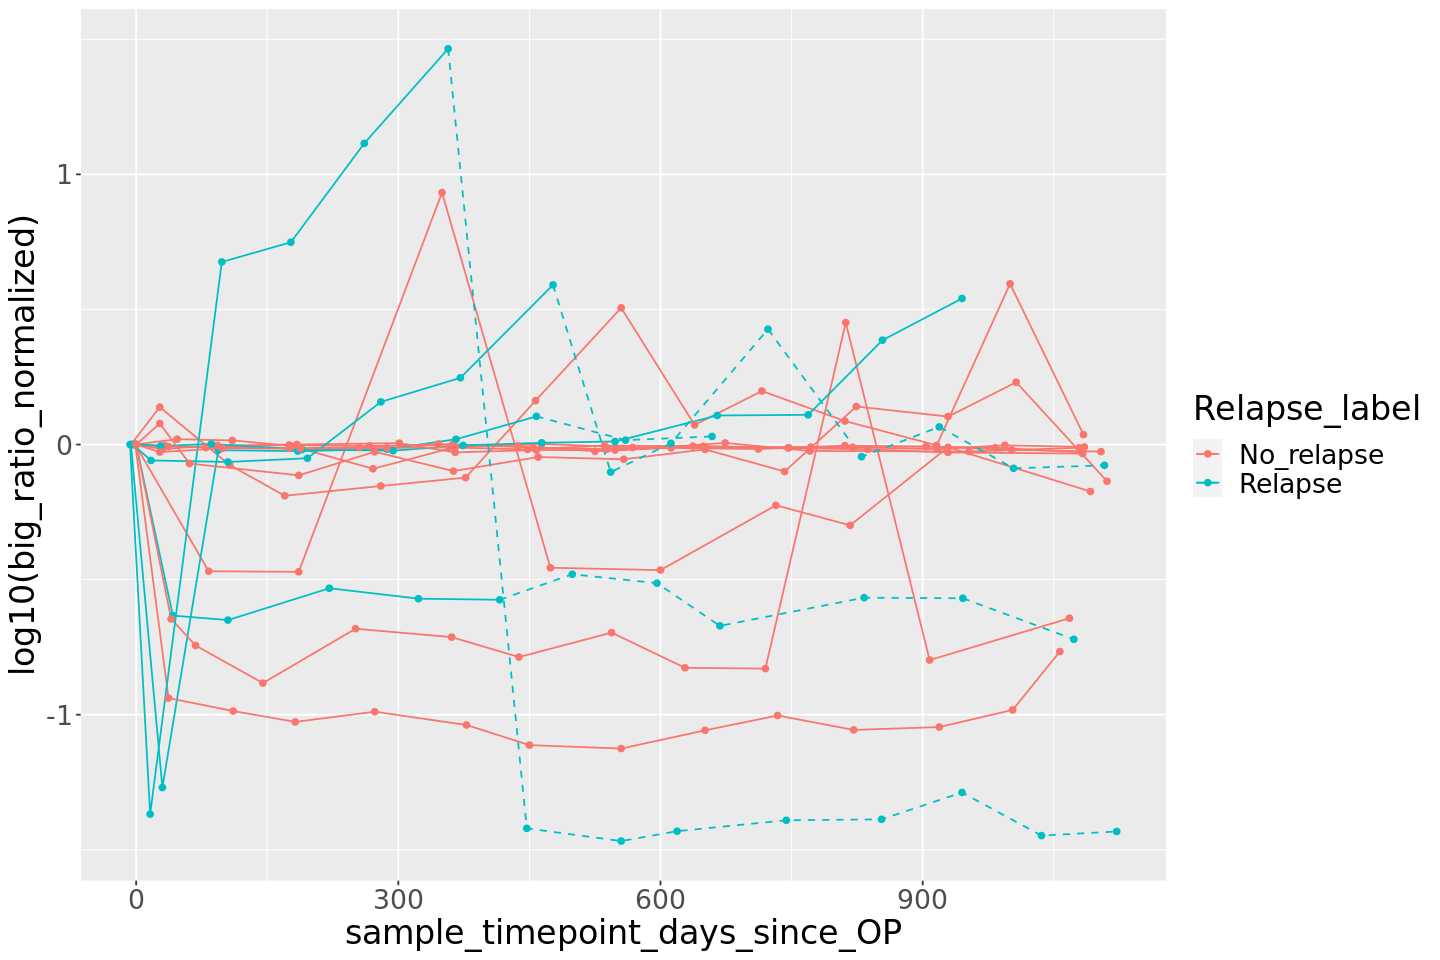

In [26]:
large_plot_big_r_normalized

In [27]:
#large_plot_big_upper_r_normalized <- ggplot() + 
#    geom_line(data = normalized_res_intervention_pre_or_no_relapse, aes(x = sample_timepoint_days_since_OP, y = log10(big_upper_ratio_normalized), color = Relapse_label, group=patient_id)) + 
#    geom_line(data = normalized_res_intervention_relapses, aes(x = sample_timepoint_days_since_OP, y = log10(big_upper_ratio_normalized), color = Relapse_label, group=patient_id), linetype = "dashed") + 
#    geom_point(data = normalized_res_intervention, aes(x = sample_timepoint_days_since_OP, y = log10(big_upper_ratio_normalized), color = Relapse_label))+ theme(text = element_text(size = 20))  
#ggsave(
#  paste("../plotting_results/", output_folder, "/big_plots/Relapse_noRelapse_Normalized_Big_upper_", filetype, ".png", sep = ""),
#  large_plot_big_upper_r_normalized, width = 12, height = 8, dpi = "print")

In [28]:
#large_plot_big_upper_r_normalized

In [29]:
large_plot_small_r_normalized <- ggplot() + 
    geom_line(data = normalized_res_intervention_pre_or_no_relapse, aes(x = sample_timepoint_days_since_OP, y = log10(small_ratio_normalized), color = Relapse_label, group=patient_id)) + 
    geom_line(data = normalized_res_intervention_relapses, aes(x = sample_timepoint_days_since_OP, y = log10(small_ratio_normalized), color = Relapse_label, group=patient_id), linetype = "dashed") + 
    geom_point(data = normalized_res_intervention, aes(x = sample_timepoint_days_since_OP, y = log10(small_ratio_normalized), color = Relapse_label))+ theme(text = element_text(size = 20)) 

ggsave(
  paste("../plotting_results/", output_folder, "/big_plots/Relapse_noRelapse_Normalized_Small_", filetype, ".png", sep = ""),
  large_plot_small_r_normalized, width = 12, height = 8, dpi = "print")

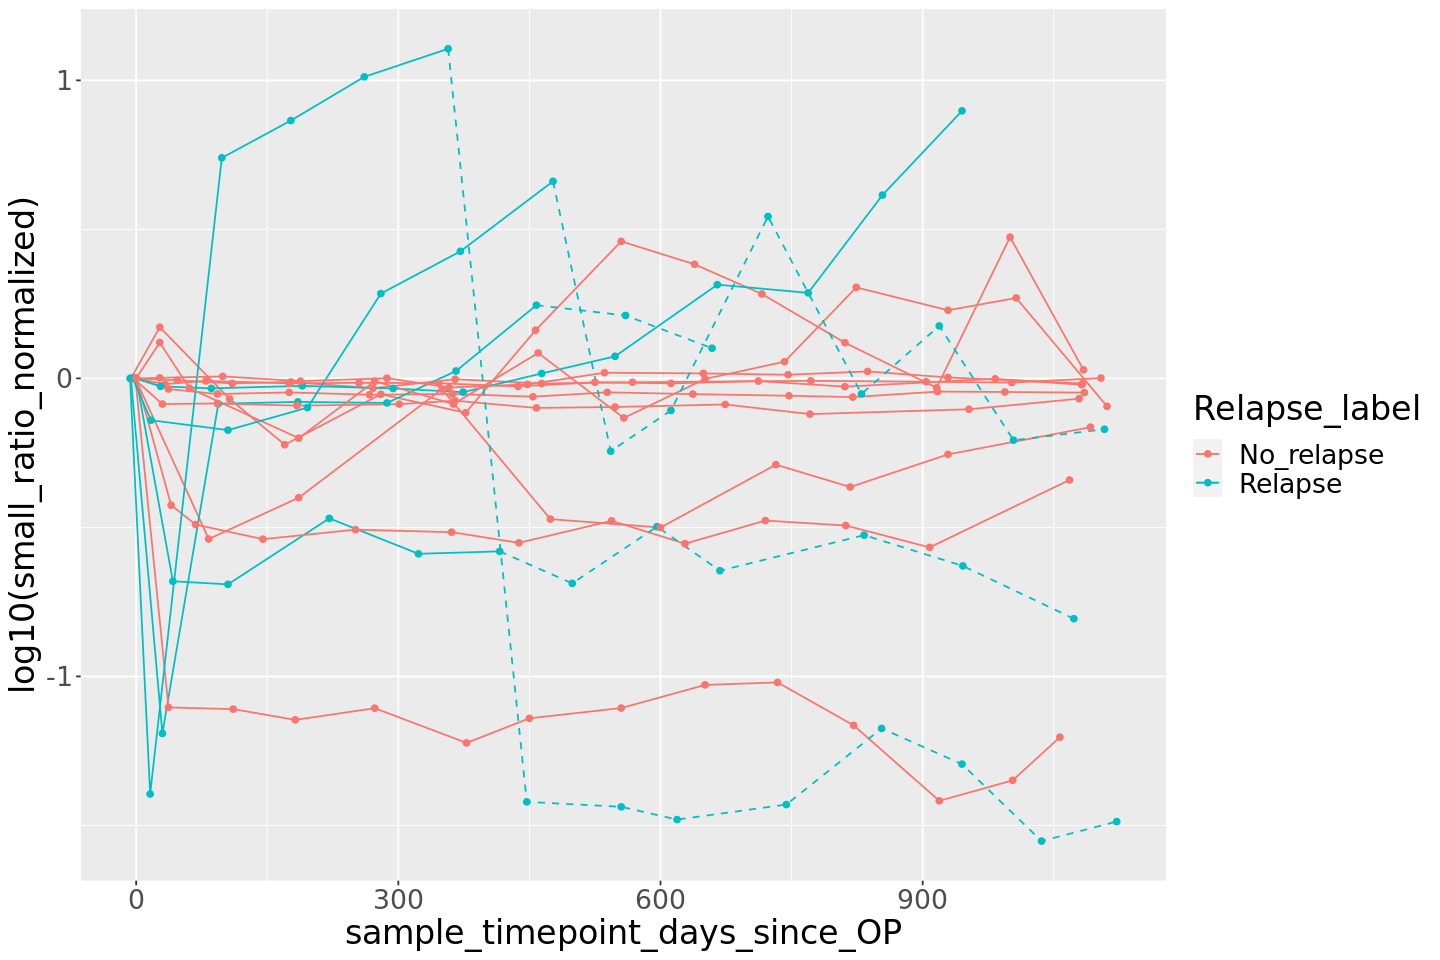

In [30]:
large_plot_small_r_normalized

## Plots normalized by post-op

In [31]:
normalized_res_post_op <-  data.frame(matrix(ncol = 8, nrow = 0))
colnames(normalized_res_post_op) <- c("patient_id", "cfDNA_folder", "big_ratio", "small_ratio", "sample_timepoint_days_since_OP", "time_to_relapse_days", "big_ratio_normalized", "small_ratio_normalized")

In [32]:
for (i in patients){
    res_pt <- res_plot %>% filter(patient_id == i)
    
    first_sample <- min(res_pt$sample_timepoint_days_since_OP)
    without_first_sample <- res_pt %>% filter(sample_timepoint_days_since_OP != first_sample)
    post_op_sample <- min(without_first_sample$sample_timepoint_days_since_OP)
        
    print(post_op_sample)
    for (x in res_pt$cfDNA_folder){
        sample_label_check <- res_pt %>% filter(cfDNA_folder == x)
        
        if (sample_label_check$sample_timepoint_days_since_OP == post_op_sample){
            pre_val_big = sample_label_check$big_ratio
            pre_val_small = sample_label_check$small_ratio}}
    
    for (j in res_pt$cfDNA_folder){
        normalized_line <- res_pt %>% filter(cfDNA_folder == j)
        #print(normalized_line)
        normalized_line <- normalized_line %>% mutate(big_ratio_normalized = big_ratio/pre_val_big, small_ratio_normalized = small_ratio/pre_val_small)
        #print(normalized_line)
        normalized_res_post_op[nrow(normalized_res_post_op)+1,] = c(i, j, normalized_line[3:8])
    
    }}

[1] 37
[1] 27
[1] 47
[1] 42
[1] 83
[1] 30
[1] 40
[1] 33
[1] 37
[1] 30
[1] 28
[1] 16
[1] 27
[1] 17
[1] 27


In [33]:
normalized_res_post_op <- inner_join(normalized_res_post_op, relapse_label, by = "cfDNA_folder")

In [34]:
normalized_res_post_op_relapses <- normalized_res_post_op %>% filter(Relapse_label == "Relapse", sample_timepoint_days_since_OP >= time_to_relapse_days)
nnormalized_res_post_op_pre_or_no_relapse1 <- normalized_res_post_op %>% group_by(patient_id) %>% filter(Relapse_label == "Relapse", sample_timepoint_days_since_OP >= time_to_relapse_days) %>% filter(sample_timepoint_days_since_OP == min(sample_timepoint_days_since_OP))

normalized_res_post_op_pre_or_no_relapse2 <- normalized_res_post_op %>% filter(Relapse_label == "No_relapse" | 
                                                                                        sample_timepoint_days_since_OP < time_to_relapse_days)

normalized_res_post_op_pre_or_no_relapse <- bind_rows(nnormalized_res_post_op_pre_or_no_relapse1, normalized_res_post_op_pre_or_no_relapse2)

In [35]:
large_plot_big_r_normalized_by_post_op <- ggplot() + 
    geom_line(data = normalized_res_post_op_pre_or_no_relapse, aes(x = sample_timepoint_days_since_OP, y = log10(big_ratio_normalized), color = Relapse_label, group=patient_id)) + 
    geom_line(data = normalized_res_post_op_relapses, aes(x = sample_timepoint_days_since_OP, y = log10(big_ratio_normalized), color = Relapse_label, group=patient_id), linetype = "dashed") + 
    geom_point(data = normalized_res_post_op, aes(x = sample_timepoint_days_since_OP, y = log10(big_ratio_normalized), color = Relapse_label))+ theme(text = element_text(size = 20))  
ggsave(
  paste("../plotting_results/", output_folder, "/big_plots/Relapse_noRelapse_Normalized_by_post_op_Big_", filetype, ".png", sep = ""),
  large_plot_big_r_normalized_by_post_op, width = 12, height = 8, dpi = "print")

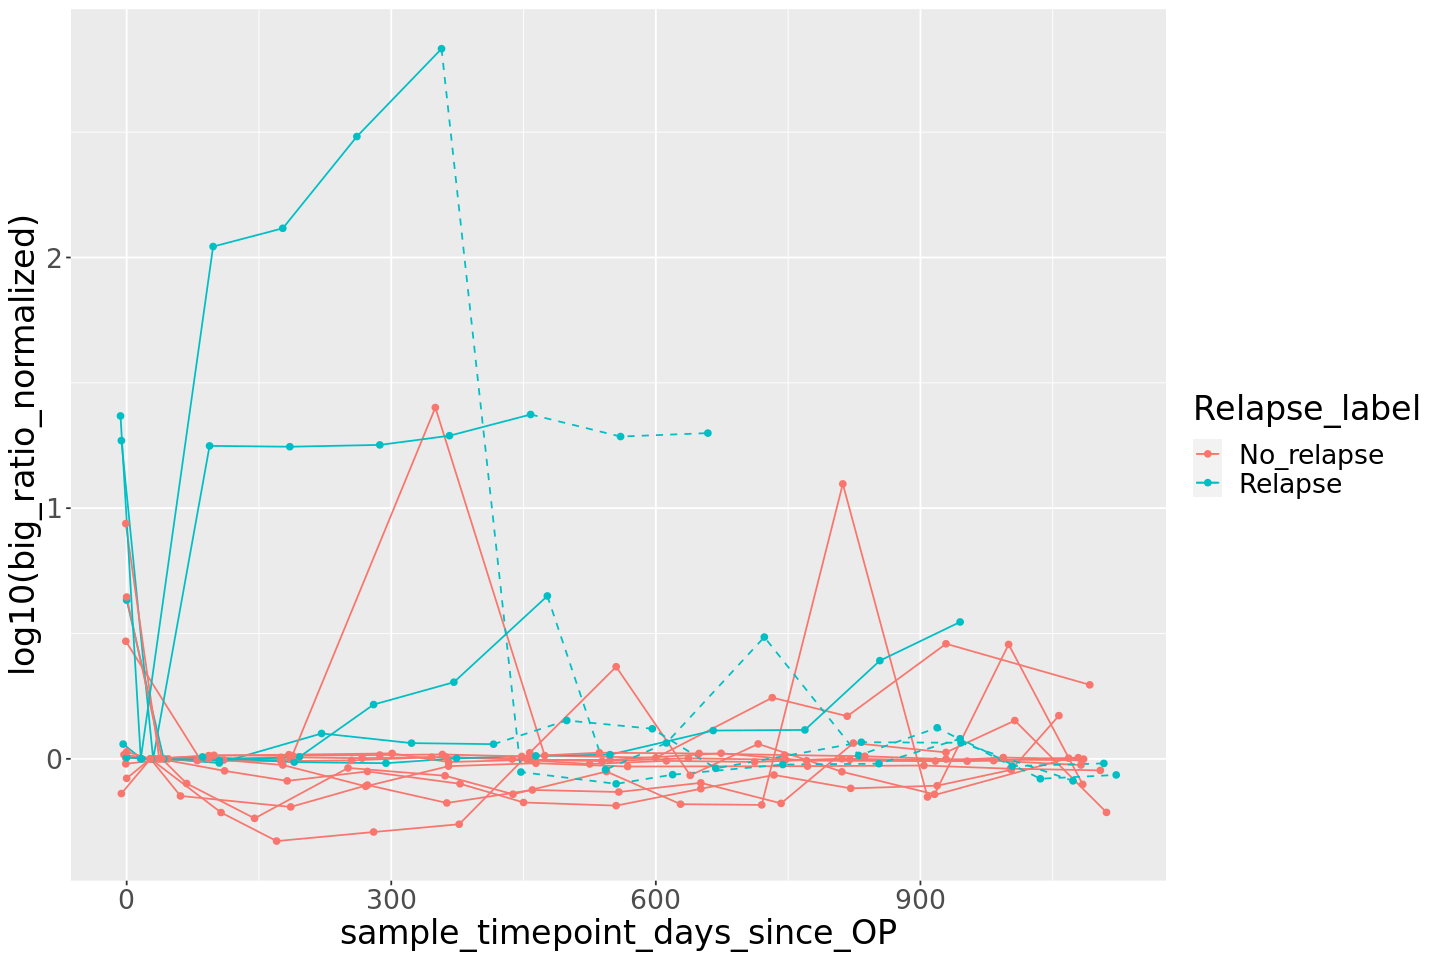

In [36]:
large_plot_big_r_normalized_by_post_op

In [37]:
#large_plot_big_upper_r_normalized_by_post_op <- ggplot() + 
#    geom_line(data = normalized_res_post_op_pre_or_no_relapse, aes(x = sample_timepoint_days_since_OP, y = log10(big_upper_ratio_normalized), color = Relapse_label, group=patient_id)) + 
#    geom_line(data = normalized_res_post_op_relapses, aes(x = sample_timepoint_days_since_OP, y = log10(big_upper_ratio_normalized), color = Relapse_label, group=patient_id), linetype = "dashed") + 
#    geom_point(data = normalized_res_post_op, aes(x = sample_timepoint_days_since_OP, y = log10(big_upper_ratio_normalized), color = Relapse_label))+ theme(text = element_text(size = 20))  
#ggsave(
#  paste("../plotting_results/", output_folder, "/big_plots/Relapse_noRelapse_Normalized_by_post_op_Big_upper_", filetype, ".png", sep = ""),
#  large_plot_big_upper_r_normalized_by_post_op, width = 12, height = 8, dpi = "print")

In [38]:
#large_plot_big_upper_r_normalized_by_post_op

In [39]:
head(normalized_res_post_op)

patient_id,cfDNA_folder,big_ratio,small_ratio,sample_timepoint_days_since_OP,time_to_relapse_days,big_ratio_normalized,small_ratio_normalized,Relapse_label
C04689,C303A04689D_cfdna_N295-103,0.04864042,0.06106838,267,NA,1.0062763,0.9566959,No_relapse
C04689,C305A04689D_cfdna_N295-71,0.04800722,0.06015989,454,NA,0.9931765,0.9424635,No_relapse
C04689,C309A04689D_cfdna_N295-47,0.04810202,0.05997005,820,NA,0.9951380,0.9394896,No_relapse
C04689,C302A04689D_cfdna_N295-102,0.04901032,0.06218607,175,NA,1.0139288,0.9742057,No_relapse
C04689,C299A04689D_cfdna_N295-99,0.04923022,0.06928741,-1,NA,1.0184782,1.0854550,No_relapse
C04689,C307A04689D_cfdna_N295-110,0.04855960,0.06136862,637,NA,1.0046043,0.9613996,No_relapse


In [40]:
large_plot_small_r_normalized_by_post_op <- ggplot() + 
    geom_line(data = normalized_res_post_op_pre_or_no_relapse, aes(x = sample_timepoint_days_since_OP, y = log10(small_ratio_normalized), color = Relapse_label, group=patient_id)) + 
    geom_line(data = normalized_res_post_op_relapses, aes(x = sample_timepoint_days_since_OP, y = log10(small_ratio_normalized), color = Relapse_label, group=patient_id), linetype = "dashed") + 
    geom_point(data = normalized_res_post_op, aes(x = sample_timepoint_days_since_OP, y = log10(small_ratio_normalized), color = Relapse_label))+ theme(text = element_text(size = 20))  
ggsave(
  paste("../plotting_results/", output_folder, "/big_plots/Relapse_noRelapse_Normalized_by_post_op_Small_", filetype, ".png", sep = ""),
  large_plot_small_r_normalized_by_post_op, width = 12, height = 8, dpi = "print")

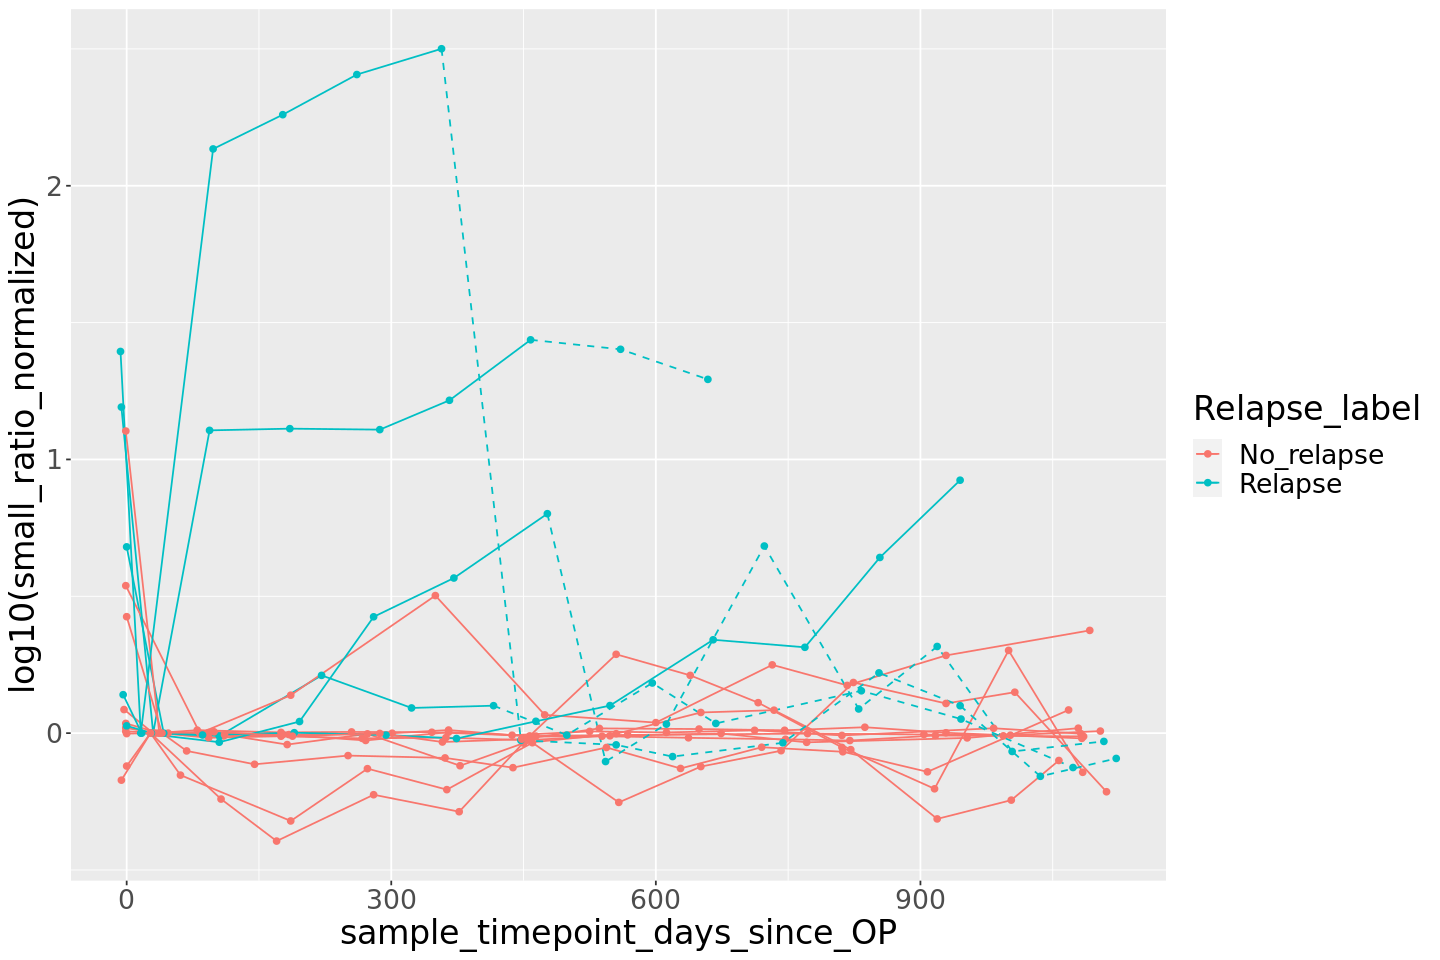

In [41]:
large_plot_small_r_normalized_by_post_op

In [42]:
head(normalized_res_intervention_relapses)

patient_id,cfDNA_folder,big_ratio,small_ratio,sample_timepoint_days_since_OP,time_to_relapse_days,big_ratio_normalized,small_ratio_normalized,Relapse_label
C04849,C261A04849D_cfdna_N295-184,0.0009380000,0.003657840,946,362.2063,0.2697704,0.2348565,Relapse
C04849,C259A04849D_cfdna_N295-147,0.0007414955,0.003525430,668,362.2063,0.2132554,0.2263549,Relapse
C04849,C260A04849D_cfdna_N295-164,0.0009426694,0.004639885,833,362.2063,0.2711133,0.2979100,Relapse
C04849,C257A04849D_cfdna_N295-124,0.0009259377,0.004093691,416,362.2063,0.2663012,0.2628409,Relapse
C04849,C194A04849D_cfdna_N295-218,0.0011510989,0.003197162,499,362.2063,0.3310580,0.2052781,Relapse
C04849,C258A04849D_cfdna_N295-141,0.0010668377,0.004954360,596,362.2063,0.3068243,0.3181013,Relapse


## Plots not normalized

In [43]:
normalized_res_intervention_pre_or_no_relapse_filtered =normalized_res_intervention_pre_or_no_relapse %>% filter(cfDNA_folder != "C255A04887D_cfdna_N295-182")
normalized_res_intervention_pre_or_no_relapse_filtered =normalized_res_intervention_pre_or_no_relapse_filtered %>% filter(cfDNA_folder != "C273A04886D_cfdna_N295-181")
normalized_res_intervention_pre_or_no_relapse_filtered =normalized_res_intervention_pre_or_no_relapse_filtered %>% filter(cfDNA_folder != "C391A05234D_cfdna_N295-188")

normalized_res_intervention_relapses_filtered = normalized_res_intervention_relapses %>% filter(cfDNA_folder != "C255A04887D_cfdna_N295-182")
normalized_res_intervention_relapses_filtered = normalized_res_intervention_relapses_filtered %>% filter(cfDNA_folder != "C273A04886D_cfdna_N295-181")
normalized_res_intervention_relapses_filtered = normalized_res_intervention_relapses_filtered %>% filter(cfDNA_folder != "C391A05234D_cfdna_N295-188")

normalized_res_intervention_filtered = normalized_res_intervention %>% filter(cfDNA_folder != "C255A04887D_cfdna_N295-182")
normalized_res_intervention_filtered = normalized_res_intervention_filtered %>% filter(cfDNA_folder != "C273A04886D_cfdna_N295-181")
normalized_res_intervention_filtered = normalized_res_intervention_filtered %>% filter(cfDNA_folder != "C391A05234D_cfdna_N295-188")

large_plot_big_r <- ggplot() + 
    geom_line(data = normalized_res_intervention_pre_or_no_relapse_filtered, aes(x = sample_timepoint_days_since_OP, y = big_ratio, color = Relapse_label, group=patient_id)) + 
    geom_line(data = normalized_res_intervention_relapses_filtered, aes(x = sample_timepoint_days_since_OP, y = big_ratio, color = Relapse_label, group=patient_id), linetype = "dashed") + 
    geom_point(data = normalized_res_intervention_filtered, aes(x = sample_timepoint_days_since_OP, y = big_ratio, color = Relapse_label))+ theme(text = element_text(size = 20)) #+geom_text(data = normalized_res_intervention, aes(x = sample_timepoint_days_since_OP, y = big_ratio, label =cfDNA_folder)) 


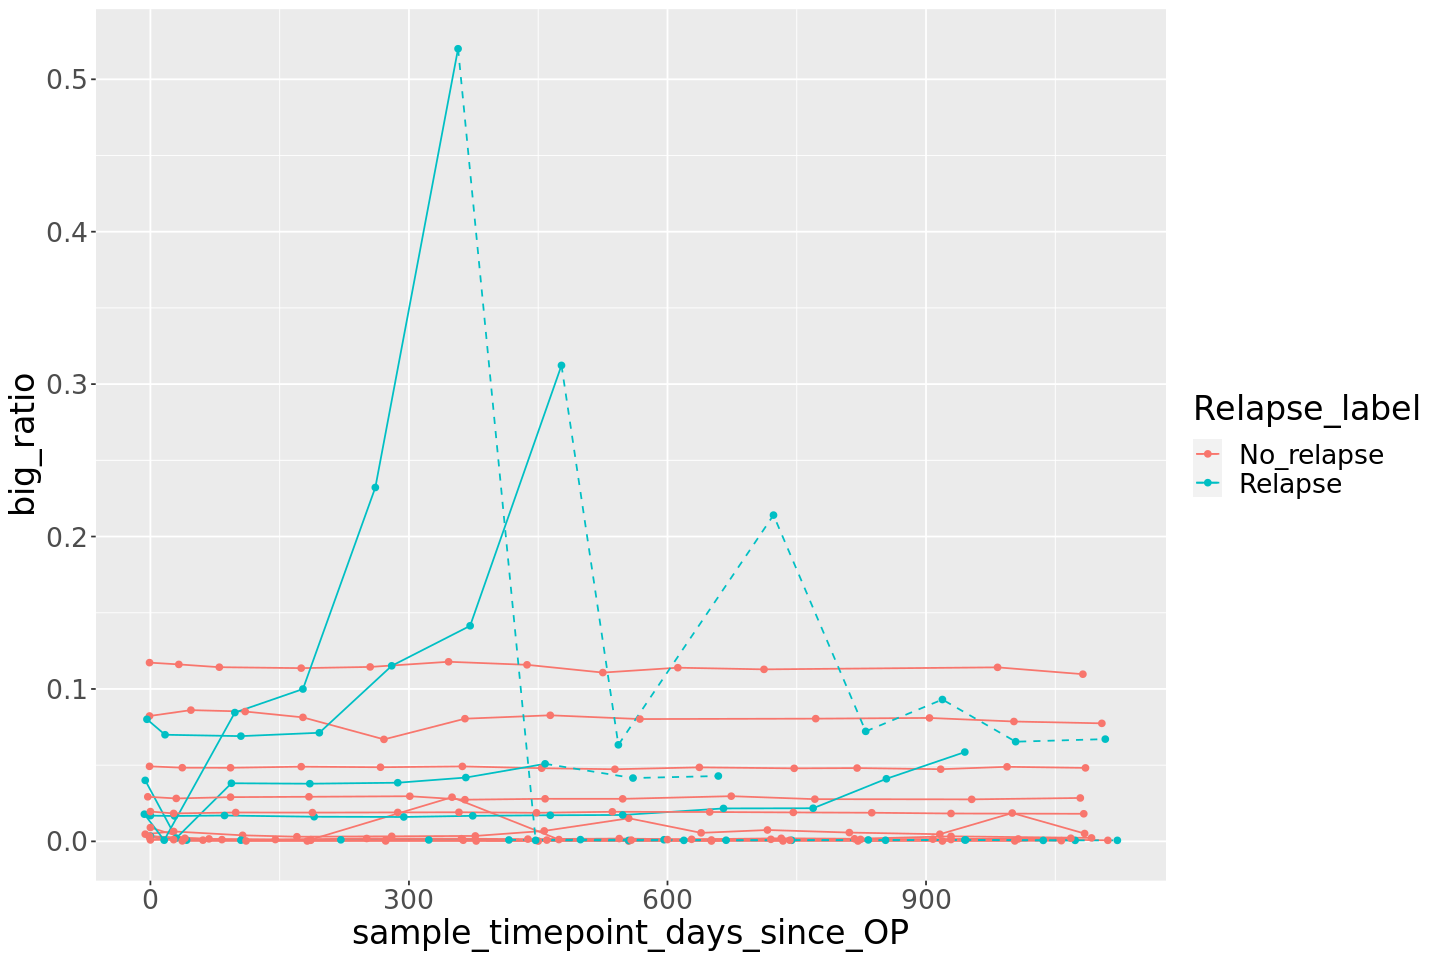

In [44]:
large_plot_big_r

In [45]:
ggsave(
  paste("../plotting_results/", output_folder, "/big_plots/Relapse_noRelapse_Big_", filetype, ".png", sep = ""),
  large_plot_big_r, width = 12, height = 8, dpi = "print")

In [46]:

#large_plot_big_upper_r <- ggplot() + 
#    geom_line(data = normalized_res_intervention_pre_or_no_relapse_filtered, aes(x = sample_timepoint_days_since_OP, y = big_upper_ratio, color = Relapse_label, group=patient_id)) + 
#    geom_line(data = normalized_res_intervention_relapses_filtered, aes(x = sample_timepoint_days_since_OP, y = big_upper_ratio, color = Relapse_label, group=patient_id), linetype = "dashed") + 
#    geom_point(data = normalized_res_intervention_filtered, aes(x = sample_timepoint_days_since_OP, y = big_upper_ratio, color = Relapse_label))+ theme(text = element_text(size = 20)) #+geom_text(data = normalized_res_intervention, aes(x = sample_timepoint_days_since_OP, y = big_ratio, label =cfDNA_folder)) 


In [47]:
#ggsave(
#  paste("../plotting_results/", output_folder, "/big_plots/Relapse_noRelapse_Big_upper_", filetype, ".png", sep = ""),
#  large_plot_big_upper_r, width = 12, height = 8, dpi = "print")

In [48]:
#large_plot_big_upper_r

In [49]:
head(normalized_res_intervention)

patient_id,cfDNA_folder,big_ratio,small_ratio,sample_timepoint_days_since_OP,time_to_relapse_days,big_ratio_normalized,small_ratio_normalized,Relapse_label
C04689,C303A04689D_cfdna_N295-103,0.04864042,0.06106838,267,NA,0.9880195,0.8813777,No_relapse
C04689,C305A04689D_cfdna_N295-71,0.04800722,0.06015989,454,NA,0.9751574,0.8682658,No_relapse
C04689,C309A04689D_cfdna_N295-47,0.04810202,0.05997005,820,NA,0.9770832,0.8655260,No_relapse
C04689,C302A04689D_cfdna_N295-102,0.04901032,0.06218607,175,NA,0.9955331,0.8975090,No_relapse
C04689,C299A04689D_cfdna_N295-99,0.04923022,0.06928741,-1,NA,1.0000000,1.0000000,No_relapse
C04689,C307A04689D_cfdna_N295-110,0.04855960,0.06136862,637,NA,0.9863778,0.8857111,No_relapse


In [50]:
#large_plot_big_r <- ggplot() + 
#    geom_line(data = normalized_res_intervention_pre_or_no_relapse, aes(x = sample_timepoint_days_since_OP, y = big_upper_ratio, color = Relapse_label, group=patient_id)) + 
#    geom_line(data = normalized_res_intervention_relapses, aes(x = sample_timepoint_days_since_OP, y = big_upper_ratio, color = Relapse_label, group=patient_id), linetype = "dashed") + 
#    geom_point(data = normalized_res_intervention, aes(x = sample_timepoint_days_since_OP, y = big_upper_ratio, color = Relapse_label))+ theme(text = element_text(size = 20)) +geom_text(data = normalized_res_intervention, aes(x = sample_timepoint_days_since_OP, y = big_upper_ratio, label =patient_id)) 
#ggsave(
#  paste("../plotting_results/", output_folder, "/big_plots/Relapse_noRelapse_Big_", filetype, ".png", sep = ""),
#  large_plot_big_r, width = 12, height = 8, dpi = "print")

In [51]:
#large_plot_big_r

In [52]:
small_plot_big_r <- ggplot() + 
    geom_line(data = normalized_res_intervention_pre_or_no_relapse, aes(x = sample_timepoint_days_since_OP, y = small_ratio, color = Relapse_label, group=patient_id)) + 
    geom_line(data = normalized_res_intervention_relapses, aes(x = sample_timepoint_days_since_OP, y = small_ratio, color = Relapse_label, group=patient_id), linetype = "dashed") + 
    geom_point(data = normalized_res_intervention, aes(x = sample_timepoint_days_since_OP, y = small_ratio, color = Relapse_label))+ theme(text = element_text(size = 20))  
ggsave(
  paste("../plotting_results/", output_folder, "/big_plots/Relapse_noRelapse_Small_", filetype, ".png", sep = ""),
  small_plot_big_r, width = 12, height = 8, dpi = "print")

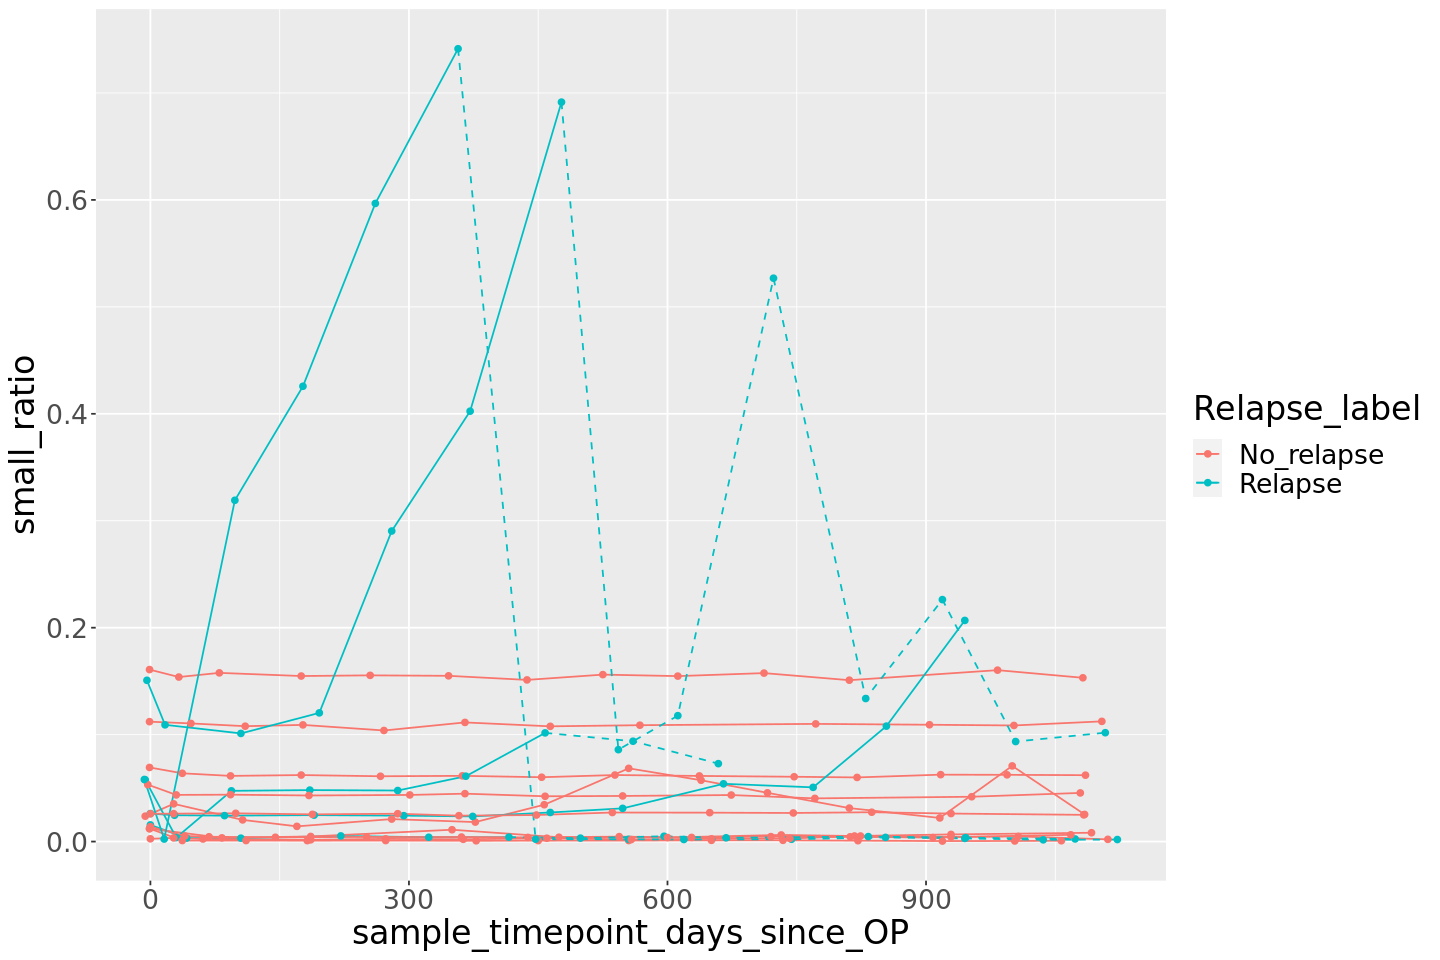

In [53]:
small_plot_big_r